In [1]:
%matplotlib widget

import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))
import h5py
import os
import torch
import numpy as np
from tqdm.autonotebook import tqdm
import os
from BasisConvolution.util.dataloader import datasetLoader, processFolder#, DataLoader
from BasisConvolution.util.hyperparameters import defaultHyperParameters
from BasisConvolution.util.dataPlotting import getFileCount, getPreparePlotFunction, getUpdatePlotFunction
import matplotlib.pyplot as plt
import ipywidgets as widgets

/tmp/ipykernel_398651/2301090393.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
hyperParameterDict = defaultHyperParameters()

hyperParameterDict['batch_size'] = 1
hyperParameterDict['maxRollOut'] = 0

hyperParameterDict['device'] = 'cuda' if torch.cuda.is_available() else 'cpu'
hyperParameterDict['device'] = 'cpu'

hyperParameterDict['augmentAngle'] = False
hyperParameterDict['augmentJitter'] = False

Dropdown(description='File:', layout=Layout(width='initial'), options=('../datasets/SFBC_dataset_I/dataset/out…

IntSlider(value=0, description='Slider:', max=2046)

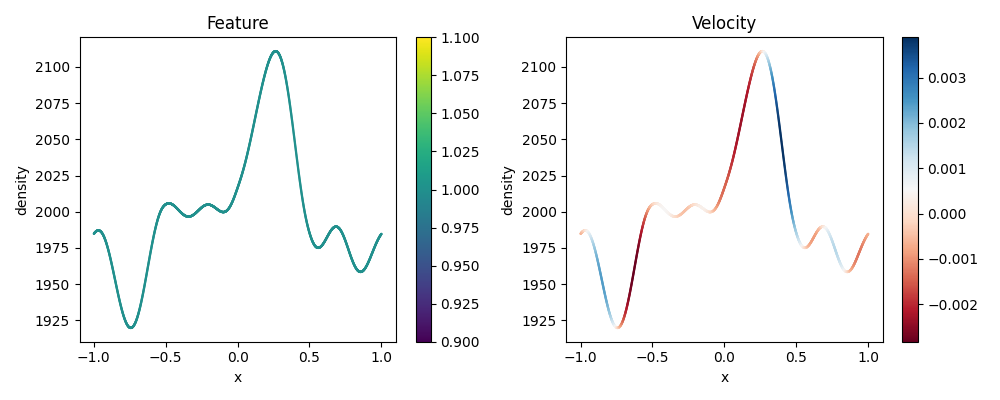

In [7]:
# datasetPath = '../datasets/SFBC_dataset_I/dataset'
# datasetPath = '../datasets/SFBC_dataset_II/dataset/train'
# datasetPath = '../datasets/SFBC_dataset_III/dataset/train'
datasetPath = '../datasets/SFBC_dataset_I/dataset'

train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))

plotState = getPreparePlotFunction(train_ds.fileFormat)(train_ds, hyperParameterDict)
updateFn = getUpdatePlotFunction(train_ds.fileFormat)

dropdown = widgets.Dropdown(options=train_ds.fileNames, description='File:', layout={'width': 'initial'})
slider = widgets.IntSlider(min=0, max=getFileCount(train_ds.fileNames[0]), value=0, description='Slider:')

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        slider.max = getFileCount(change['new'])
        if slider.value > slider.max:
            slider.value = 0
        # print(change['new'], slider.value)
        updateFn(plotState, train_ds, hyperParameterDict, [change['new'], slider.value, None, None, None])

def on_change_slider(change):
    if change['type'] == 'change' and change['name'] == 'value':   
        # print(change['new'])
        updateFn(plotState, train_ds, hyperParameterDict, [dropdown.value, change['new'], None, None, None])

dropdown.observe(on_change)
slider.observe(on_change_slider)

display(dropdown)
display(slider)